# COGS 118A Final Project

Dayoung Ki
PID: A15514387

## Data Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

## (1) Iris

### Importing Data

The Iris dataset was from UCI Machine Learning Repository and the link is provided here:
https://archive.ics.uci.edu/dataset/53/iris

In [2]:
# Defining column headers for the Iris Dataset
headers_iris = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

df_iris = pd.read_csv('Data_Iris/iris.data', header = None, names = headers_iris)

#Data preview
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the data types in the data
print(df_iris.dtypes)

#Checking for any Null values in the Dataset
remove = df_iris[df_iris.isnull().any(axis=1)]

# Dropping any samples with Null values
df_iris = df_iris.drop(remove.index, axis=0)

#Data preview
df_iris.head()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Using SKlearn's label encoder function for string features
label_encoder = LabelEncoder()

# Encoding the 'class' column
df_iris["class"] = label_encoder.fit_transform(df_iris["class"])

# Data preview
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Randomly sampling 100 rows and resetting index
df_iris = df_iris.sample(n=100).reset_index(drop=True)

#Converting the DataFrame to a NumPy array
df_iris = df_iris.values

# Data preview
print(df_iris[0:5])

[[5.2 3.4 1.4 0.2 0. ]
 [7.4 2.8 6.1 1.9 2. ]
 [7.2 3.  5.8 1.6 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [5.4 3.4 1.5 0.4 0. ]]


### Classifier Functions

In [6]:
# Initializing a global variable to keep track of function calls
count = 0

def heatmap(acc, acc_desc, C_list, character):
    
    # Accessing the global variable within the function
    global count
    
    # Creating a heatmap using Seaborn library
    plt.figure(figsize=(2, 4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    
    # Customizing the heatmap appearance
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$' + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid': False})
    
    plt.show()
    
    # Increment the count of function calls
    count += 1

In [7]:
#Support Vector Machines (SVM) classification

def svm_function():
    
    # Defining a SVM classifier with a linear kernel
    classifier = svm.SVC(kernel='linear')
    
    # Defining a list of values for the regularization parameter
    C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
    parameters = {'C': C_list}
    
    # Using GridSearchCV for hyperparameter tuning with cross-validation
    clf = GridSearchCV(classifier, parameters, return_train_score=True, cv=5)
    clf.fit(X_train_val, y_train_val)

    # Calculating and visualizing training and validation accuracy using the heatmap function
    train_acc = clf.cv_results_['mean_train_score'].reshape(-1, 1)
    heatmap(train_acc, 'train accuracy', C_list, 'C')
    val_acc = clf.cv_results_['mean_test_score'].reshape(-1, 1)
    heatmap(val_acc, 'val accuracy', C_list, 'C')

    # Training an optimal SVM classifier with the best hyperparameters found
    optimal_classifier = SVC(kernel='linear', C=clf.best_params_['C'])
    optimal_classifier.fit(X_train_val, y_train_val)
    
    # Extracting the best training accuracy from the results
    best_train_acc = None
    for i_iris, j_iris in enumerate(C_list):
        if j_iris == clf.best_params_['C']:
            best_train_acc = train_acc[i_iris][0]

    test_acc = optimal_classifier.score(X_test, y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

In [8]:
# Decision-Tree classification

def decision_tree():
    
    # Defining a list of values
    d_list = np.array([1, 2, 3, 4, 5])
    
    # Using GridSearchCV to perform hyperparameter tuning for Decision Tree Classifier
    parameters = {'max_depth': d_list}
    classifier_grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    
    # Plotting the heatmap for train and validation accuracies
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=d_list, xticklabels=['Train Acc'])
    plt.title('DT train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Max Depth (D)')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=d_list, xticklabels=['Validation Acc'])
    plt.title('DT val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Max Depth (D)')

    plt.tight_layout()
    plt.show()

    # Extracting the best parameter value
    d_star = classifier_grid.best_params_['max_depth']
    
    # Training a Decision Tree classifier
    classifier_test = DecisionTreeClassifier(max_depth=d_star, criterion="entropy")
    classifier_test.fit(X_train_val, y_train_val)
    decision_test_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_iris, j_iris in enumerate(d_list):
        if j_iris == d_star:
            best_train_acc = train_acc[i_iris][0]

    return decision_test_acc, best_train_acc, d_star

In [9]:
# K-Nearest Neighbors (KNN) classification

def knn_classifier():
    
    # Defining a list of values
    k_list = np.array([1, 2, 3, 4, 5, 6])
    
    # Using GridSearchCV to perform hyperparameter tuning for KNN Classifier
    parameters = {'n_neighbors': k_list}
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    
    # Plotting the heatmap for train and validation accuracies
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=['Train Acc'])
    plt.title('KNN train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('K')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=['Validation Acc'])
    plt.title('KNN val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('K')

    plt.tight_layout()
    plt.show()

    # Extracting the best parameter value
    k_star = classifier_grid.best_params_['n_neighbors']
    
    # Training a KNN classifier
    classifier_test = KNeighborsClassifier(n_neighbors=k_star)
    classifier_test.fit(X_train_val, y_train_val)
    knn_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_iris, j_iris in enumerate(k_list):
        if j_iris == k_star:
            best_train_acc = train_acc[i_iris][0]

    return knn_acc, best_train_acc, k_star

In [10]:
# Random Forest classification

def random_forest():
    # Defining a list of values
    estimators_list = np.array([50, 100, 150, 200, 250])

    # Using GridSearchCV to perform hyperparameter tuning for Random Forest Classifier
    parameters = {'n_estimators': estimators_list}
    classifier_grid = GridSearchCV(RandomForestClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)

    # Plotting the heatmap for train and validation accuracies
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=estimators_list, xticklabels=['Train Acc'])
    plt.title('RF train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Estimators')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=estimators_list, xticklabels=['Validation Acc'])
    plt.title('RF val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Estimators')

    plt.tight_layout()
    plt.show()

    # Extracting the best parameter value
    estimators_star = classifier_grid.best_params_['n_estimators']

    # Training a Random Forest classifier
    classifier_test = RandomForestClassifier(n_estimators=estimators_star, criterion="entropy")
    classifier_test.fit(X_train_val, y_train_val)
    random_forest_test_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_iris, j_iris in enumerate(estimators_list):
        if j_iris == estimators_star:
            best_train_acc = train_acc[i_iris][0]

    return random_forest_test_acc, best_train_acc, estimators_star

### Classification

Partition: 0.8


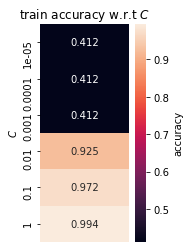

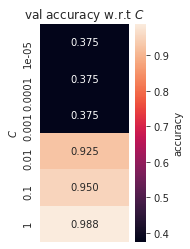

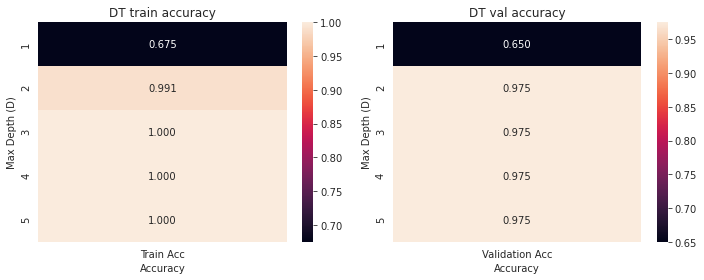

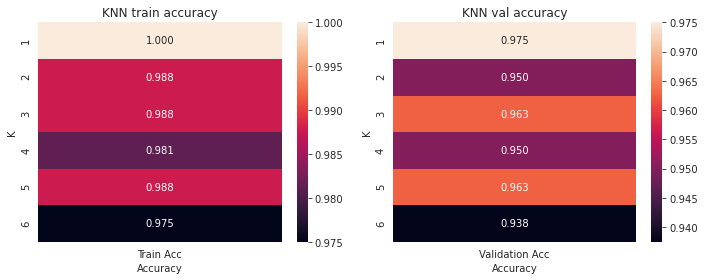

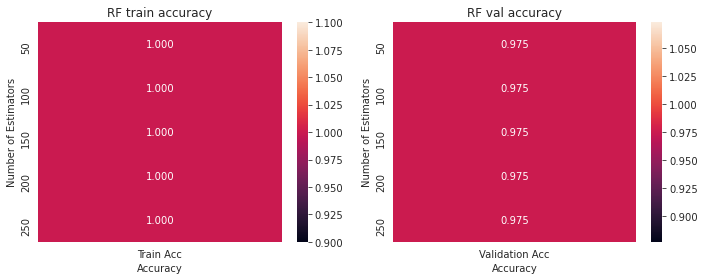

Test Accuracy Mean for SVM: 0.9
Test Accuracy Mean for Decision Tree: 0.8
Test Accuracy Mean for KNN: 0.95
Test Accuracy Mean for Random Forest: 0.9
Partition: 0.5


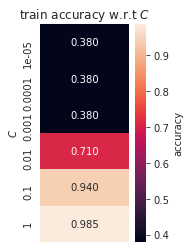

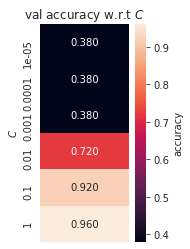

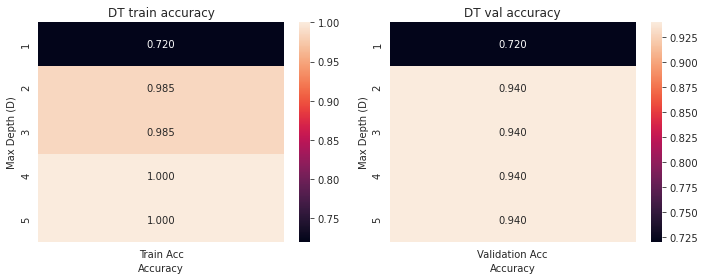

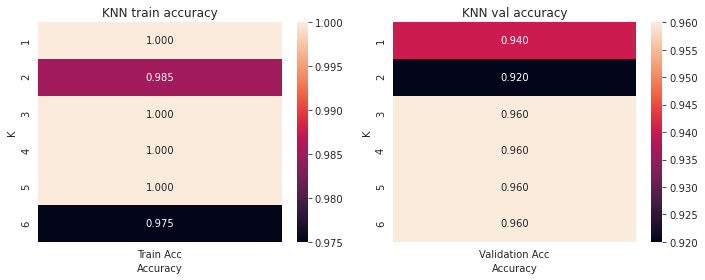

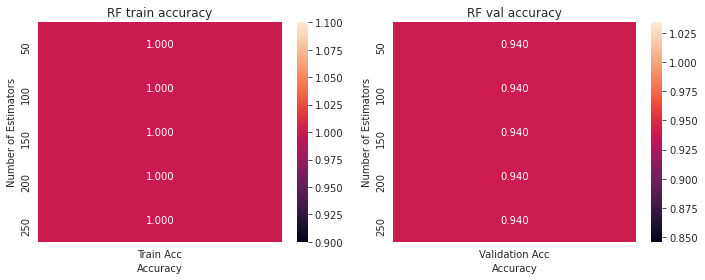

Test Accuracy Mean for SVM: 1.0
Test Accuracy Mean for Decision Tree: 0.96
Test Accuracy Mean for KNN: 0.96
Test Accuracy Mean for Random Forest: 0.94
Partition: 0.2


/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


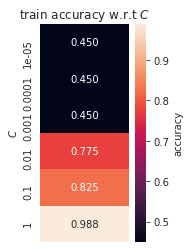

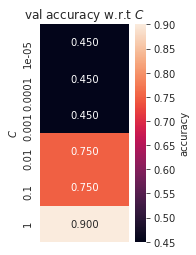

/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


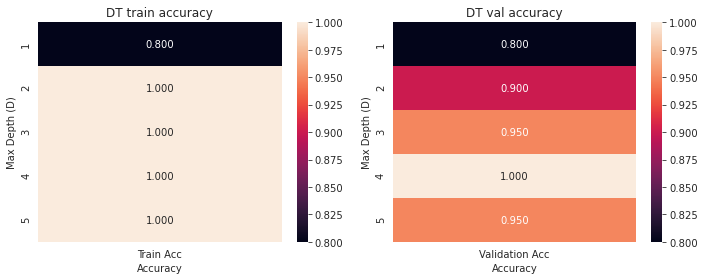

/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


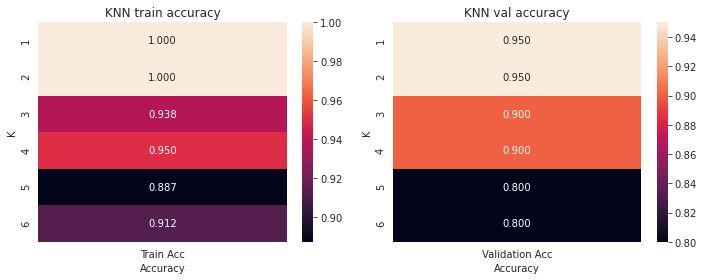

/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


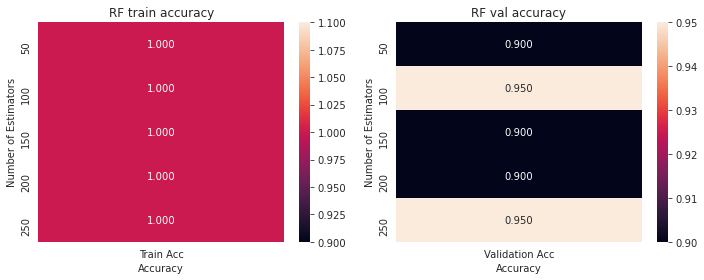

Test Accuracy Mean for SVM: 0.975
Test Accuracy Mean for Decision Tree: 0.9625
Test Accuracy Mean for KNN: 0.925
Test Accuracy Mean for Random Forest: 0.9625


In [11]:
# Defining the partitions for data splitting
partition_val = [0.8, 0.5, 0.2]

# Initializing result table to store metrics
result_table = np.zeros((3, 4))
result_table1 = np.zeros((3, 4))
result_table2 = np.zeros((3, 4))

# Loop through partition values
for i_iris, partition in enumerate(partition_val):
    print("Partition:", partition)
    
    # Lists to store test accuracies
    svm_test_acc = []
    decision_tree_test_acc = []
    knn_test_acc = []
    random_forest_test_acc = []
    NUM_TRIALS = 1
    
    # Iterating through trials
    for j_iris in range(NUM_TRIALS):
        # Shuffling the data
        np.random.shuffle(df_iris)
        
        # Determining the point to split the data
        break_num = int(partition * len(df_iris))
        
        # Splitting data into train and test sets
        X_train_val = df_iris[:break_num, :-1]
        y_train_val = df_iris[:break_num, -1]
        X_test = df_iris[break_num:, :-1]
        y_test = df_iris[break_num:, -1]
        
        # Evaluatng SVM classifier
        test_acc, best_train0, C0 = svm_function()
        svm_test_acc.append(test_acc)
        
        # Evaluatng Decision Tree classifier
        test_acc, best_train2, C2 = decision_tree()
        decision_tree_test_acc.append(test_acc)
        
        # Evaluatng KNN classifier
        test_acc, best_train1, C1 = knn_classifier()
        knn_test_acc.append(test_acc)
        
        # Evaluating Random Forest classifier
        test_acc, best_train_rf, estimators_star = random_forest()
        random_forest_test_acc.append(test_acc)
    
    # Calculating mean test accuracies for all trials
    result_table[i_iris, 0] = sum(svm_test_acc) / NUM_TRIALS
    result_table[i_iris, 1] = sum(decision_tree_test_acc) / NUM_TRIALS
    result_table[i_iris, 2] = sum(knn_test_acc) / NUM_TRIALS
    result_table[i_iris, 3] = sum(random_forest_test_acc) / NUM_TRIALS
    
    # Storing additional metrics for best training accuracy
    result_table1[i_iris, 0] = best_train0
    result_table1[i_iris, 1] = best_train1
    result_table1[i_iris, 2] = best_train2
    result_table1[i_iris, 3] = best_train_rf
    
    # Storing hyperparameters for SVM, Decision Tree, KNN, Random Forest
    result_table2[i_iris, 0] = C0
    result_table2[i_iris, 1] = C1
    result_table2[i_iris, 2] = C2
    result_table2[i_iris, 3] = estimators_star
    
    print("Test Accuracy Mean for SVM:", sum(svm_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for Decision Tree:", sum(decision_tree_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for KNN:", sum(knn_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for Random Forest:", sum(random_forest_test_acc) / NUM_TRIALS)

## (2) Car Evaluation

### Importing Data
The Car Evaluation dataset was from UCI Machine Learning Repository and the link is provided here:
http://archive.ics.uci.edu/dataset/19/car+evaluation

In [12]:
# Defining column headers for the Car Evaluation Dataset
headers_car = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

df_car = pd.read_csv('Data_CarEvaluation/car.data', header = None, names = headers_car)

#Data preview
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [13]:
#Checking the data types in the data
print(df_car.dtypes)

#Checking for any Null values in the Dataset
df_car[df_car.isnull().any(axis=1)]

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object


,buying,maint,doors,persons,lug_boot,safety,class


In [14]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in headers_car:
    df_car[col] = label_encoder.fit_transform(df_car[col])

# Data preview
print(df_car.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [15]:
# Converting the data to a NumPy array
df_car_numpy_array = df_car.values

# Displaying the shape of the NumPy array
print(df_car_numpy_array.shape)

(1728, 7)


In [16]:
# Using NumPy to modify a specific column
df_car_numpy_array[:, -1] = np.where(df_car_numpy_array[:, -1] != 'unacceptable', 1, 0)

# Displaying the updated array
print(df_car_numpy_array[:5])

[[3 3 0 0 2 1 1]
 [3 3 0 0 2 2 1]
 [3 3 0 0 2 0 1]
 [3 3 0 0 1 1 1]
 [3 3 0 0 1 2 1]]


/tmp/ipykernel_283/843272535.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  df_car_numpy_array[:, -1] = np.where(df_car_numpy_array[:, -1] != 'unacceptable', 1, 0)


In [17]:
# Extracting features and target variable from NumPy array
X = df_car_numpy_array[:, :-1]
y = df_car_numpy_array[:, -1]

# Splitting dataset into training and testing sets
X_train, X_test = X[:1382], X[1382:]
y_train, y_test = y[:1382], y[1382:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1382, 6) (346, 6) (1382,) (346,)


### Classifier Functions

In [18]:
# Initializing a global variable to keep track of function calls
count = 0

def heatmap(acc, acc_desc, C_list, character):
    
    # Accessing the global variable within the function
    global count
    
    # Creating a heatmap using Seaborn library
    plt.figure(figsize=(2, 4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    
    # Customizing the heatmap appearance
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$' + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid': False})
    
    plt.show()
    count += 1

In [19]:
#Support Vector Machines (SVM) classification

def svm_function(X_train_val, y_train_val, X_test, y_test):
    
    # Initializing SVM classifier with a linear kernel
    classifier = SVC(kernel='linear')
    
    # List of C values for hyperparameter tuning
    C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
    parameters = {'C': C_list}
    
    # Using GridSearchCV for hyperparameter tuning
    clf = GridSearchCV(classifier, parameters, return_train_score=True, cv=5)
    clf.fit(X_train_val, y_train_val)

    # Generating and displaying heatmaps for train and validation accuracy
    train_acc = clf.cv_results_['mean_train_score'].reshape(-1, 1)
    heatmap(train_acc, 'train accuracy', C_list, 'C')
    val_acc = clf.cv_results_['mean_test_score'].reshape(-1, 1)
    heatmap(val_acc, 'val accuracy', C_list, 'C')

    # Training the classifier with the optimal C value
    optimal_classifier = SVC(kernel='linear', C=clf.best_params_['C'])
    optimal_classifier.fit(X_train_val, y_train_val)
    
    # Finding the best training accuracy
    best_train_acc = None
    for i_car, j_car in enumerate(C_list):
        if j_car == clf.best_params_['C']:
            best_train_acc = train_acc[i_car][0]

    test_acc = optimal_classifier.score(X_test, y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

In [20]:
# Decision-Tree classification

def decision_tree(X_train_val, y_train_val, X_test, y_test):
    d_list = np.array([1, 2, 3, 4, 5])  # Corrected variable name here
    
    # Parameter grid for hyperparameter tuning
    parameters = {'max_depth': d_list}
    classifier_grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=d_list, xticklabels=['Train Acc'])
    plt.title('DT train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Max Depth (D)')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=d_list, xticklabels=['Validation Acc'])
    plt.title('DT val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Max Depth (D)')

    plt.tight_layout()
    plt.show()

    # Testing with best parameter
    d_star = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=d_star, criterion="entropy")
    classifier_test.fit(X_train_val, y_train_val)
    decision_test_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_car, j_car in enumerate(d_list):
        if j_car == d_star:
            best_train_acc = train_acc[i_car][0]

    return decision_test_acc, best_train_acc, d_star

In [21]:
# K-Nearest Neighbors (KNN) classification

def knn_classifier(X_train_val, y_train_val, X_test, y_test):
    k_list = np.array([1, 2, 3, 4, 5, 6])
    
    # Parameter grid for hyperparameter tuning
    parameters = {'n_neighbors': k_list}
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=['Train Acc'])
    plt.title('KNN train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('K')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=['Validation Acc'])
    plt.title('KNN val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('K')

    plt.tight_layout()
    plt.show()

    # Testing with best parameter
    k_star = classifier_grid.best_params_['n_neighbors']
    classifier_test = KNeighborsClassifier(n_neighbors=k_star)
    classifier_test.fit(X_train_val, y_train_val)
    knn_acc = classifier_test.score(X_test, y_test)
    
    # Finding the best training accuracy
    best_train_acc = None
    for i_car, j_car in enumerate(k_list):
        if j_car == k_star:
            best_train_acc = train_acc[i_car][0]

    return knn_acc, best_train_acc, k_star

In [22]:
# Random Forest classification

def random_forest(X_train_val, y_train_val, X_test, y_test):
    estimators_list = np.array([50, 100, 150, 200, 250])

    # Parameter grid for hyperparameter tuning
    parameters = {'n_estimators': estimators_list}
    classifier_grid = GridSearchCV(RandomForestClassifier(criterion="entropy"), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=estimators_list, xticklabels=['Train Acc'])
    plt.title('Random Forest train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Estimators')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=estimators_list, xticklabels=['Validation Acc'])
    plt.title('Random Forest val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Estimators')

    plt.tight_layout()
    plt.show()

    # Testing with best parameter
    estimators_star = classifier_grid.best_params_['n_estimators']
    classifier_test = RandomForestClassifier(n_estimators=estimators_star, criterion="entropy")
    classifier_test.fit(X_train_val, y_train_val)
    rf_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i, j in enumerate(estimators_list):
        if j == estimators_star:
            best_train_acc = train_acc[i][0]

    return rf_acc, best_train_acc, estimators_star

### Classification

Partition: 0.8


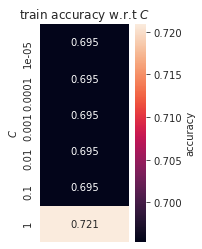

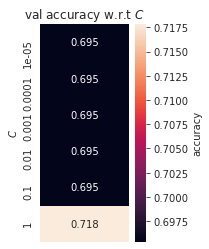

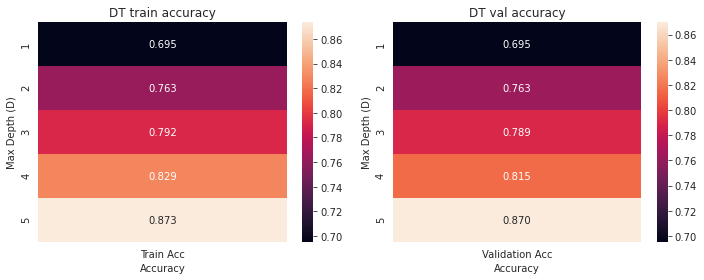

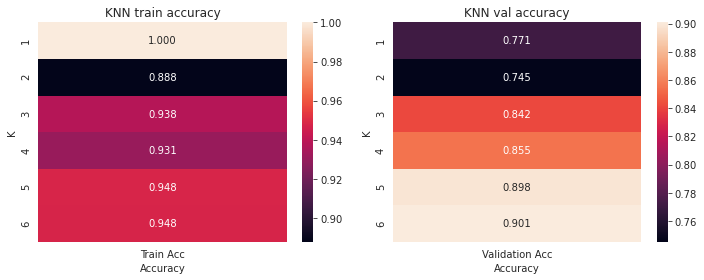

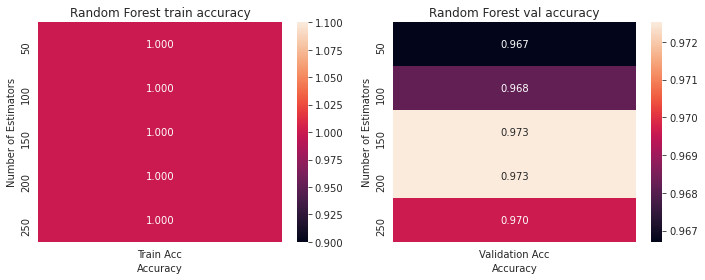

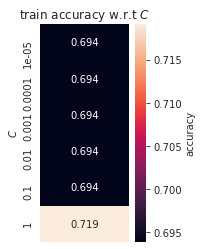

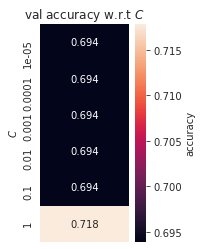

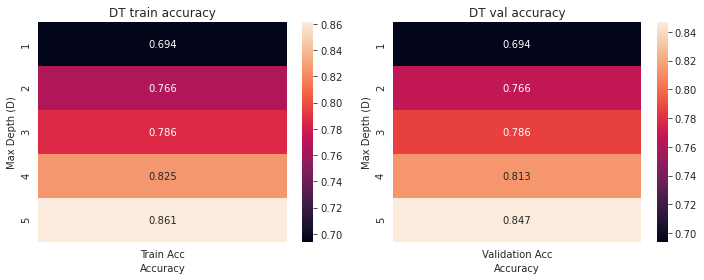

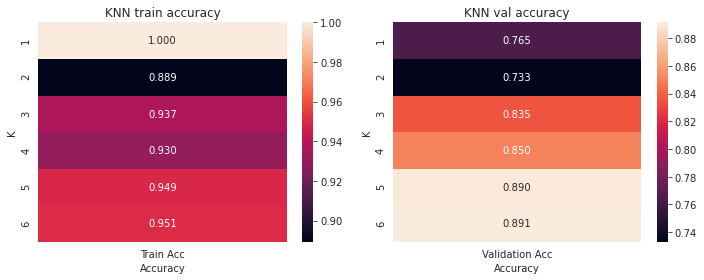

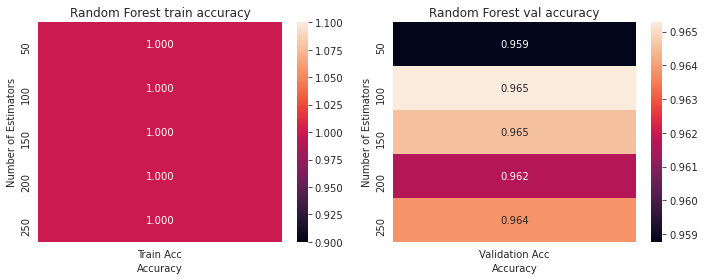

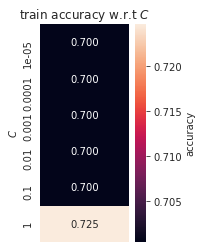

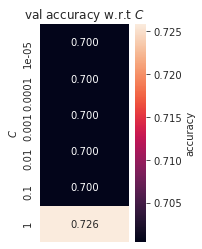

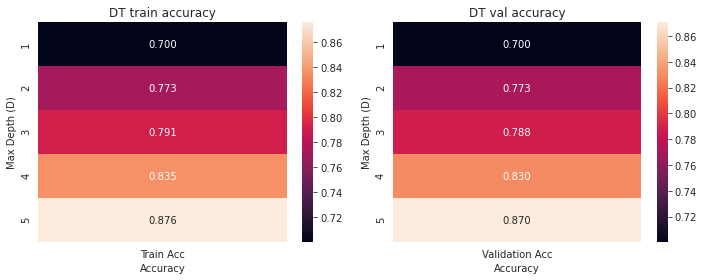

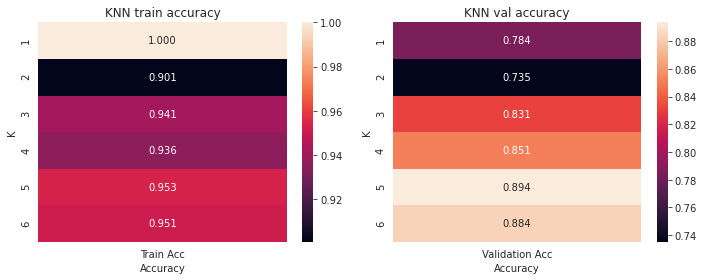

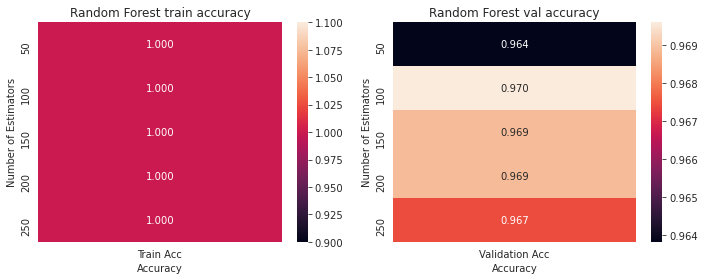

Test Accuracy Mean for SVM: 0.7379576107899807
Test Accuracy Mean for Decision Tree: 0.8728323699421964
Test Accuracy Mean for KNN: 0.9075144508670521
Test Accuracy Mean for Random Forest: 0.9778420038535645
Partition: 0.5


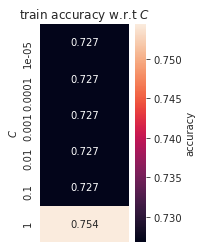

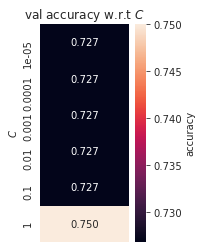

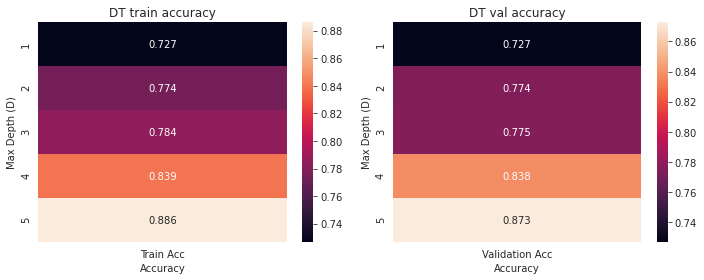

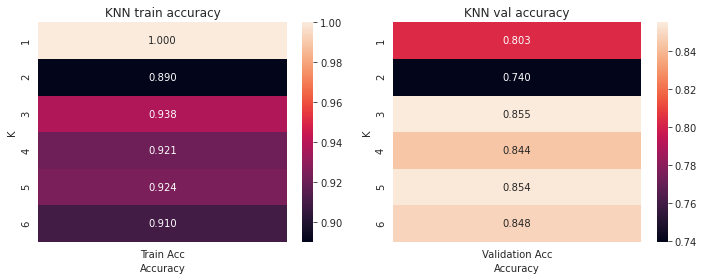

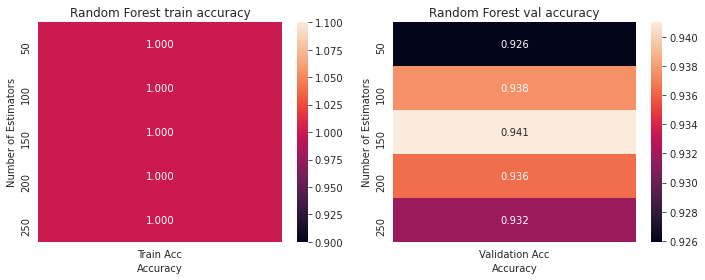

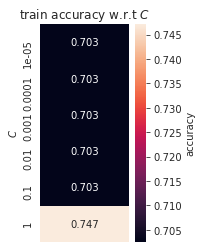

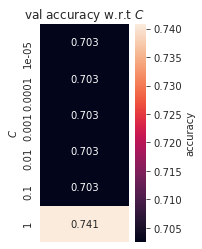

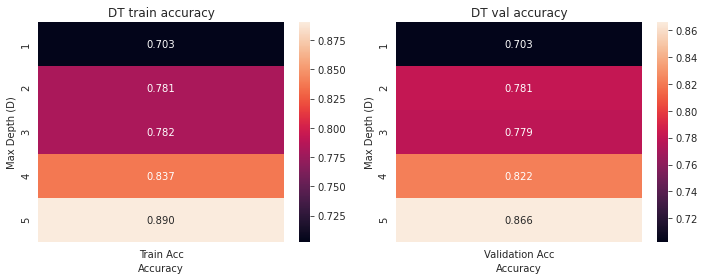

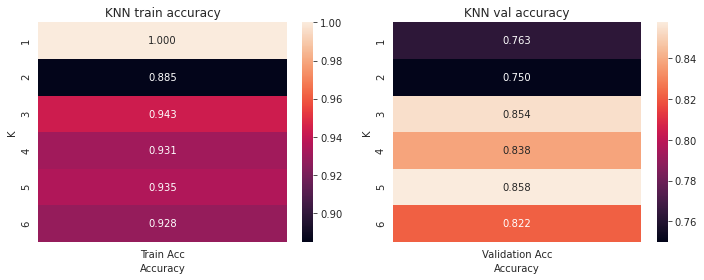

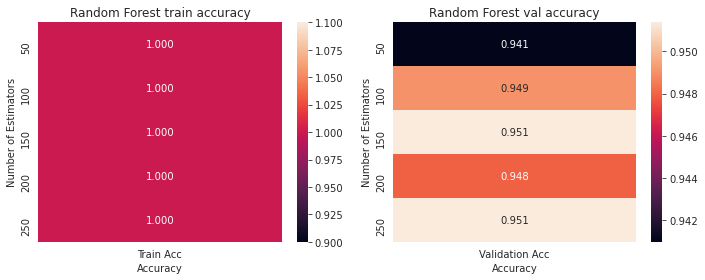

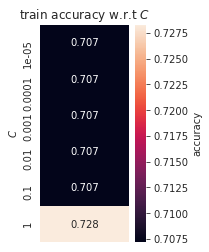

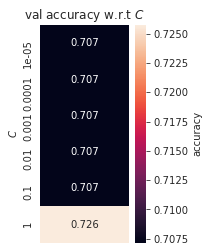

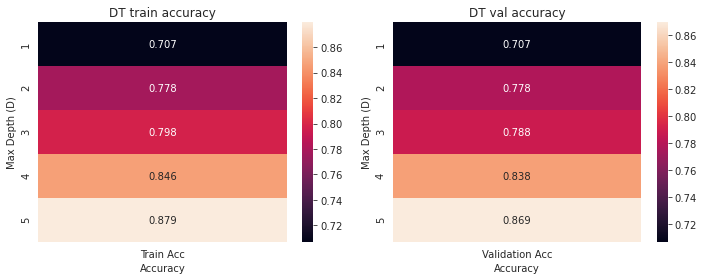

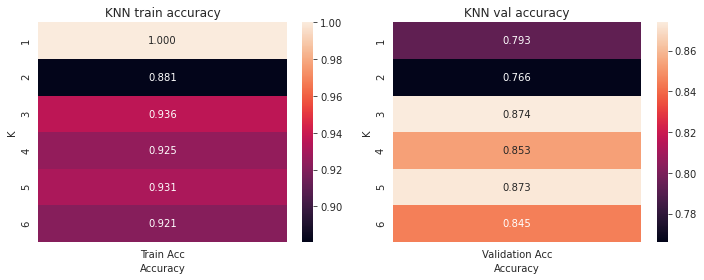

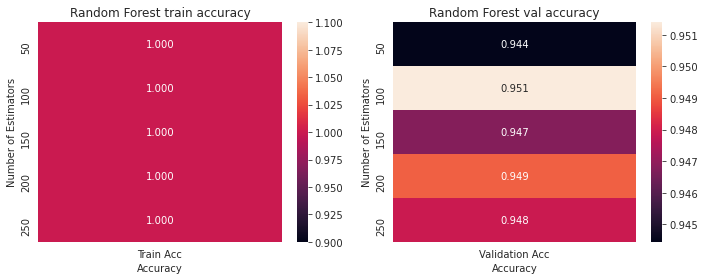

Test Accuracy Mean for SVM: 0.7079475308641975
Test Accuracy Mean for Decision Tree: 0.8487654320987654
Test Accuracy Mean for KNN: 0.8591820987654321
Test Accuracy Mean for Random Forest: 0.9498456790123457
Partition: 0.2


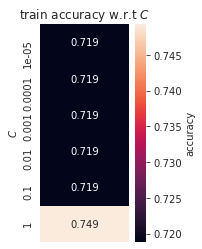

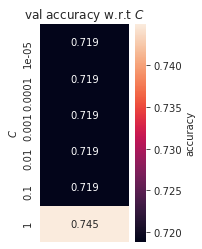

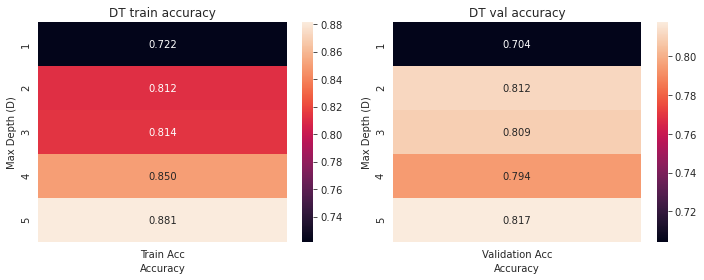

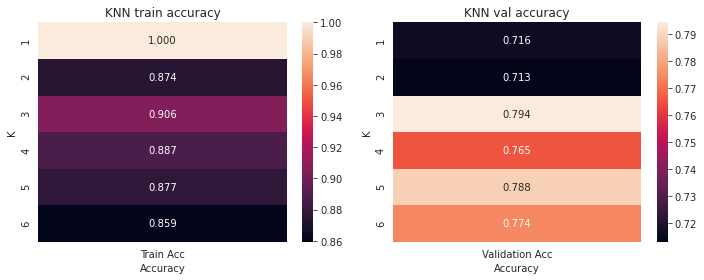

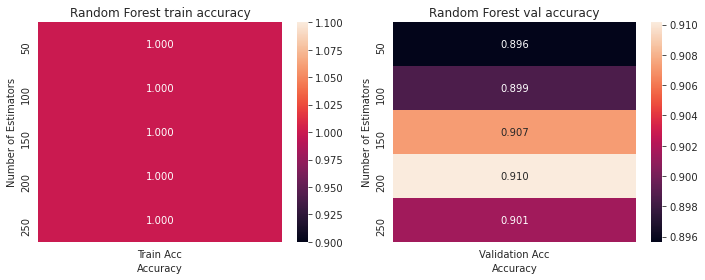

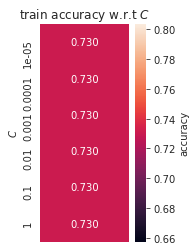

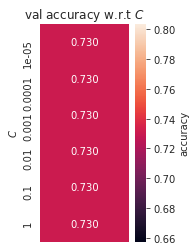

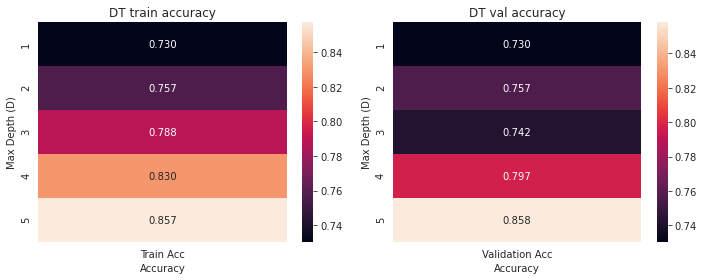

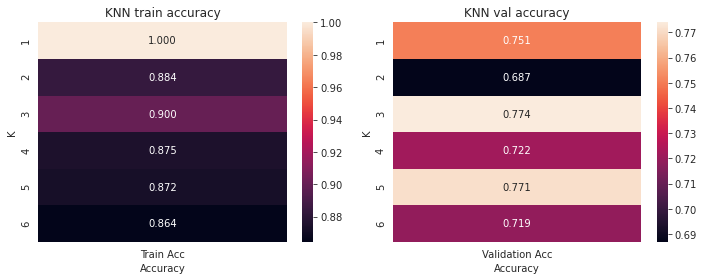

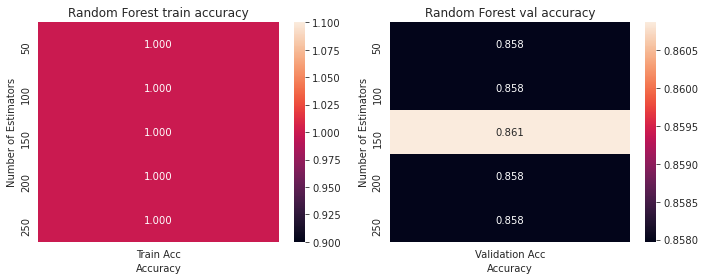

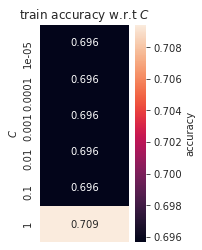

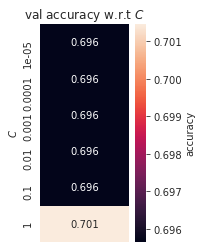

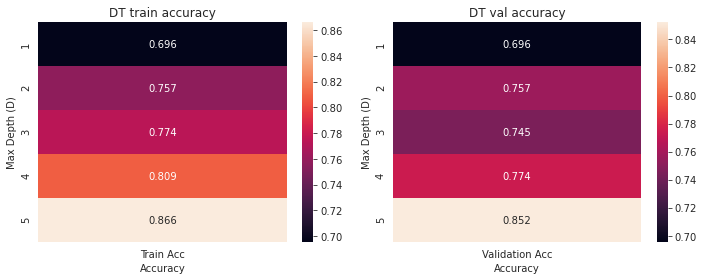

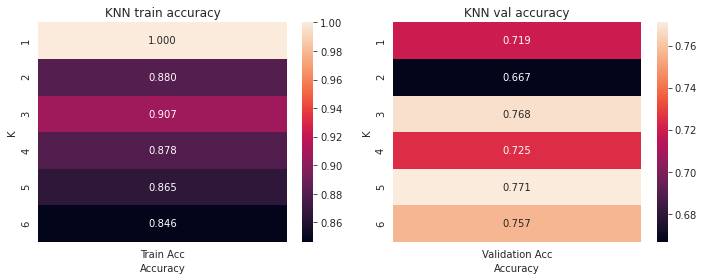

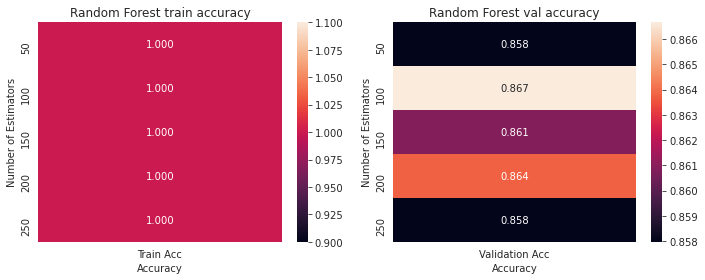

Test Accuracy Mean for SVM: 0.7098095926729332
Test Accuracy Mean for Decision Tree: 0.8394793926247289
Test Accuracy Mean for KNN: 0.7953723788864787
Test Accuracy Mean for Random Forest: 0.8939503494818029


In [23]:
# Resetting the DataFrame index
df_car = df_car.reset_index(drop=True)

# List of partition values (80/20, 50/50, 20/80)
partition_val = [0.8, 0.5, 0.2]

# Creating a table to store test accuracies
result_table = np.zeros((3, 4))

# Looping through different partition values
for i_car, partition in enumerate(partition_val):
    print("Partition:", partition)
    
    # Lists to store test accuracies for each classifier
    svm_test_acc = []
    decision_tree_test_acc = []
    knn_test_acc = []
    random_forest_test_acc = []
    NUM_TRIALS = 3
    
    # Iterating over trials
    for j_car in range(NUM_TRIALS):
        
         # Shuffling the DataFrame
        np.random.shuffle(df_car.values)
        
        # Splitting data based on the current partition value
        break_num = int(partition * len(df_car))
        X_train_val = df_car.iloc[:break_num, :6]
        y_train_val = df_car.iloc[:break_num, 6]
        X_test = df_car.iloc[break_num:, :6]
        y_test = df_car.iloc[break_num:, 6]
        
        # Evaluating each classifiers and storing test accuracy
        test_acc, _, _ = svm_function(X_train_val, y_train_val, X_test, y_test)
        svm_test_acc.append(test_acc)
        test_acc, _, _ = decision_tree(X_train_val, y_train_val, X_test, y_test)
        decision_tree_test_acc.append(test_acc)
        test_acc, _, _ = knn_classifier(X_train_val, y_train_val, X_test, y_test)
        knn_test_acc.append(test_acc)
        test_acc, _, _ = random_forest(X_train_val, y_train_val, X_test, y_test)
        random_forest_test_acc.append(test_acc)
        
    # Storing test accuracies in result_table
    result_table[j_car, 0] = sum(svm_test_acc) / NUM_TRIALS
    result_table[j_car, 1] = sum(decision_tree_test_acc) / NUM_TRIALS
    result_table[j_car, 2] = sum(knn_test_acc) / NUM_TRIALS
    result_table[j_car, 3] = sum(random_forest_test_acc) / NUM_TRIALS
    
    print("Test Accuracy Mean for SVM:", sum(svm_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for Decision Tree:", sum(decision_tree_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for KNN:", sum(knn_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for Random Forest:", sum(random_forest_test_acc) / NUM_TRIALS)

## (3) Glass Identification

### Importing Data
The Glass Identification dataset was from UCI Machine Learning Repository and the link is provided here:
https://archive.ics.uci.edu/dataset/42/glass+identification

In [24]:
# Defining column headers for the Car Evaluation Dataset
headers_glass = ["Id_number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

df_glass = pd.read_csv('Data_Glass/glass.data', header = None, names = headers_glass)

#Data preview
df_glass.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
#Checking the data types in the data
print(df_glass.dtypes)

#Checking for any Null values in the Dataset
df_glass[df_glass.isnull().any(axis=1)]

# Dropping any samples with Null values
df_glass = df_glass.drop(remove.index, axis=0)

#Data preview
df_glass.head()

Id_number    float64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe             int64
dtype: object


,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in headers_glass:
    df_glass[col] = label_encoder.fit_transform(df_glass[col])

# Displaying the updated DataFrame with encoded categorical features
print(df_glass.head())

   Id_number   RI  Na  Mg  Al  Si   K  Ca  Ba  Fe
1        146   86  93  27  19   5  72   0   0   0
2         81  101  62  52  68  30  11   0   0   0
3         29   81  57  66  88  26  10   0   0   0
4         84   58  71  45  60  39  33   0   0   0
5         71   62  64  40  97  37  23   0   0   0


In [27]:
# Randomly sampling 100 rows and resetting index
df_glass = df_glass.sample(n=100).reset_index(drop=True)

#Converting the DataFrame to a NumPy array
df_glass = df_glass.values

# Data preview
print(df_glass[0:5])

[[174   1   0  11  97   0 141   0   0   1]
 [ 81 101  62  52  68  30  11   0   0   0]
 [156  92  84  10  17  16 111   0   0   0]
 [112  39  75  28  40  46  84   0  19   1]
 [ 85  18  58  46  97  43  69   0  11   0]]


### Classifier Functions

In [28]:
# Initializing a global variable to keep track of function calls
count = 0

def heatmap(acc, acc_desc, C_list, character):
    
    # Accessing the global variable within the function
    global count
    
    # Creating a heatmap using Seaborn library
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    
    # Customizing the heatmap appearance
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$' + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid': False})
    
    plt.show()
    
    # Increment the count of function calls
    count += 1

In [29]:
#Support Vector Machines (SVM) classification

def svm_function():
    
    # Defining a SVM classifier with a linear kernel
    classifier = svm.SVC(kernel='linear')
    
    # Defining a list of values for the regularization parameter
    C_list = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
    parameters = {'C': C_list}
    
    # Using GridSearchCV for hyperparameter tuning with cross-validation
    clf = GridSearchCV(classifier, parameters, return_train_score=True, cv=2)
    clf.fit(X_train_val, y_train_val)

    # Calculating and visualizing training and validation accuracy using the heatmap function
    train_acc = clf.cv_results_['mean_train_score'].reshape(-1, 1)
    heatmap(train_acc, 'train accuracy', C_list, 'C')
    val_acc = clf.cv_results_['mean_test_score'].reshape(-1, 1)
    heatmap(val_acc, 'val accuracy', C_list, 'C')

    # Training an optimal SVM classifier with the best hyperparameters found
    optimal_classifier = SVC(kernel='linear', C=clf.best_params_['C'])
    optimal_classifier.fit(X_train_val, y_train_val)
    
    # Extracting the best training accuracy from the results
    best_train_acc = None
    for i_glass, j_glass in enumerate(C_list):
        if j_glass == clf.best_params_['C']:
            best_train_acc = train_acc[i_glass][0]

    test_acc = optimal_classifier.score(X_test, y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

In [30]:
# Decision-Tree classification

def decision_tree():
    
    # Defining a list of values
    d_list = np.array([1, 2, 3, 4, 5])
    
    # Using GridSearchCV to perform hyperparameter tuning for Decision Tree Classifier
    parameters = {'max_depth': d_list}
    classifier_grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), parameters, cv=2, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    
    # Plotting the heatmap for train and validation accuracies
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=d_list, xticklabels=['Train Acc'])
    plt.title('DT train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Max Depth (D)')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=d_list, xticklabels=['Validation Acc'])
    plt.title('DT val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Max Depth (D)')

    plt.tight_layout()
    plt.show()

    # Extracting the best parameter value
    d_star = classifier_grid.best_params_['max_depth']
    
    # Training a Decision Tree classifier
    classifier_test = DecisionTreeClassifier(max_depth=d_star, criterion="entropy")
    classifier_test.fit(X_train_val, y_train_val)
    decision_test_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_glass, j_glass in enumerate(d_list):
        if j_glass == d_star:
            best_train_acc = train_acc[i_glass][0]

    return decision_test_acc, best_train_acc, d_star

In [31]:
# K-Nearest Neighbors (KNN) classification

def knn_classifier():
    
    # Defining a list of values
    k_list = np.array([1, 2, 3, 4, 5, 6])
    
    # Using GridSearchCV to perform hyperparameter tuning for KNN Classifier
    parameters = {'n_neighbors': k_list}
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=2, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    
    # Plotting the heatmap for train and validation accuracies
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=['Train Acc'])
    plt.title('KNN train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('K')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=['Validation Acc'])
    plt.title('KNN val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('K')

    plt.tight_layout()
    plt.show()

    # Extracting the best parameter value
    k_star = classifier_grid.best_params_['n_neighbors']
    
    # Training a KNN classifier
    classifier_test = KNeighborsClassifier(n_neighbors=k_star)
    classifier_test.fit(X_train_val, y_train_val)
    knn_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_glass, j_glass in enumerate(k_list):
        if j_glass == k_star:
            best_train_acc = train_acc[i_glass][0]

    return knn_acc, best_train_acc, k_star

In [32]:
# Random Forest classification

def random_forest():
    
    # Defining a list of values for the number of estimators (trees)
    n_estimators_list = [50, 100, 150, 200, 250]
    
    # Using GridSearchCV to perform hyperparameter tuning for Random Forest Classifier
    parameters = {'n_estimators': n_estimators_list}
    classifier_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=2, return_train_score=True)
    classifier_grid.fit(X_train_val, y_train_val)

    # Plotting the heatmap for train and validation accuracies
    train_acc = classifier_grid.cv_results_['mean_train_score'].reshape(-1, 1)
    val_acc = classifier_grid.cv_results_['mean_test_score'].reshape(-1, 1)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_acc, annot=True, fmt='.3f', yticklabels=n_estimators_list, xticklabels=['Train Acc'])
    plt.title('Random Forest train accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Estimators')

    plt.subplot(1, 2, 2)
    sns.heatmap(val_acc, annot=True, fmt='.3f', yticklabels=n_estimators_list, xticklabels=['Validation Acc'])
    plt.title('Random Forest val accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Number of Estimators')

    plt.tight_layout()
    plt.show()

    # Extracting the best parameter value
    n_estimators_star = classifier_grid.best_params_['n_estimators']
    
    # Training a Random Forest classifier
    classifier_test = RandomForestClassifier(n_estimators=n_estimators_star)
    classifier_test.fit(X_train_val, y_train_val)
    rf_test_acc = classifier_test.score(X_test, y_test)

    # Finding the best training accuracy
    best_train_acc = None
    for i_glass, j_glass in enumerate(n_estimators_list):
        if j_glass == n_estimators_star:
            best_train_acc = train_acc[i_glass][0]

    return rf_test_acc, best_train_acc, n_estimators_star

### Classification

Partition: 0.8


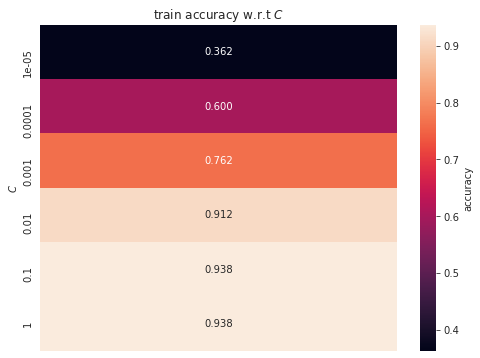

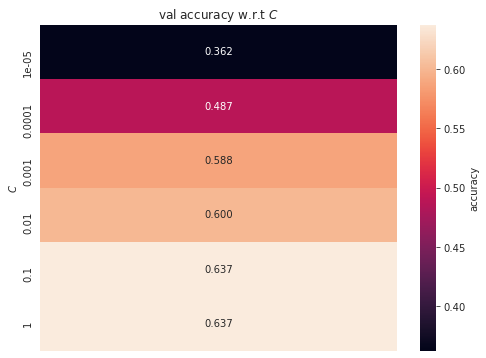

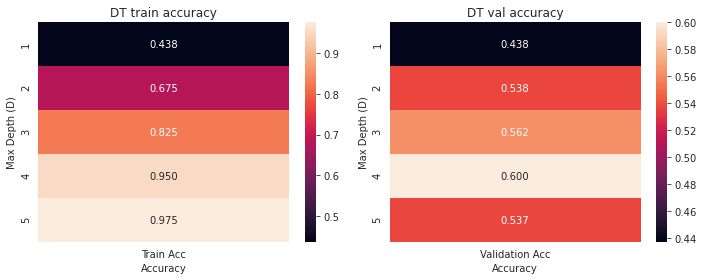

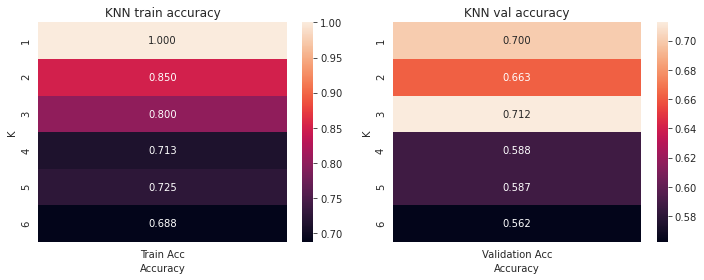

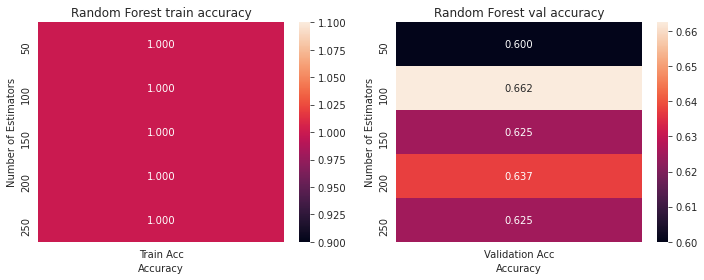

Test Accuracy Mean for SVM: 0.6
Test Accuracy Mean for Decision Tree: 0.5
Test Accuracy Mean for KNN: 0.7
Test Accuracy Mean for Random Forest: 0.75
Partition: 0.5


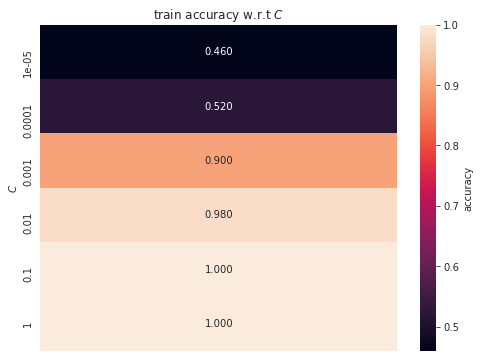

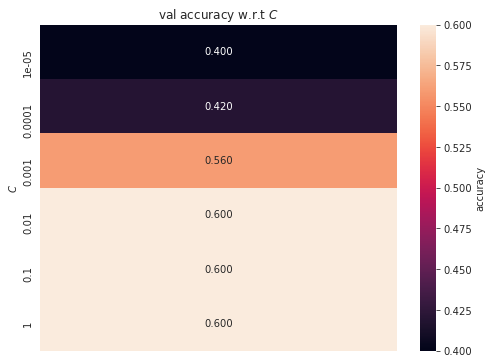

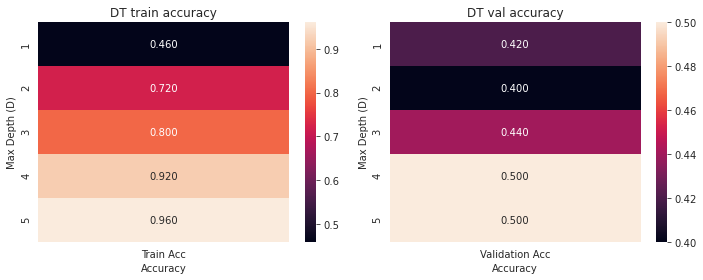

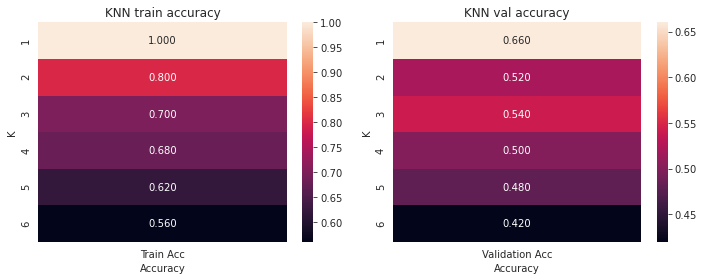

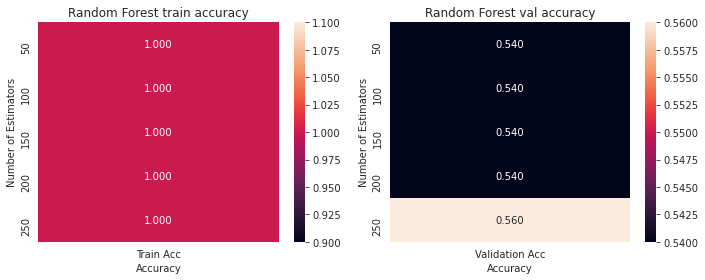

Test Accuracy Mean for SVM: 0.66
Test Accuracy Mean for Decision Tree: 0.6
Test Accuracy Mean for KNN: 0.74
Test Accuracy Mean for Random Forest: 0.68
Partition: 0.2


/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


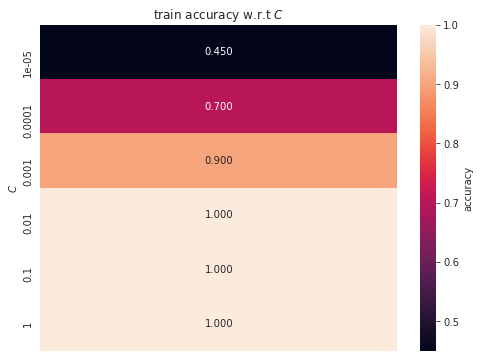

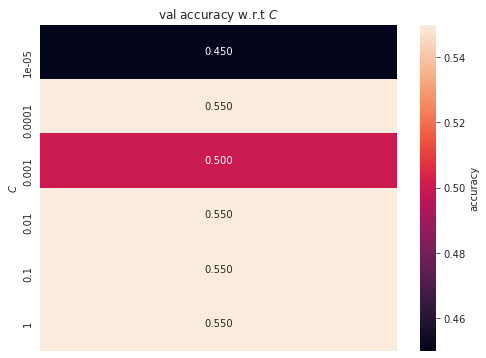

/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


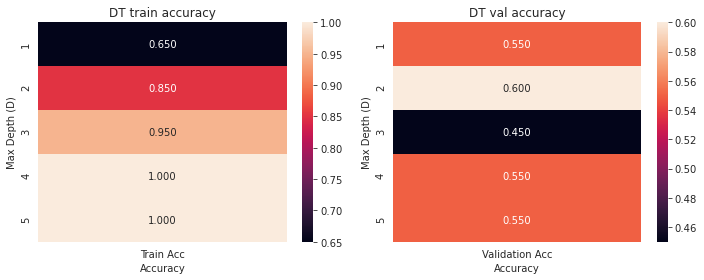

/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


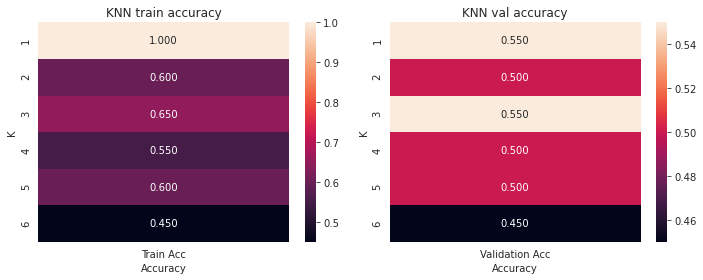

/home/dki/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


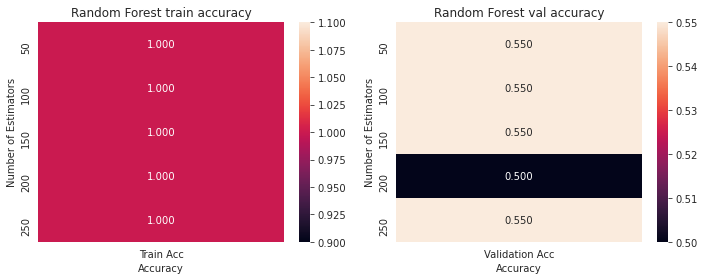

Test Accuracy Mean for SVM: 0.375
Test Accuracy Mean for Decision Tree: 0.475
Test Accuracy Mean for KNN: 0.55
Test Accuracy Mean for Random Forest: 0.4625


In [33]:
# Defining the partitions for data splitting
partition_val = [0.8, 0.5, 0.2]

# Initializing result tables to store metrics
result_table = np.zeros((len(partition_val), 4))
result_table1 = np.zeros((len(partition_val), 4))
result_table2 = np.zeros((len(partition_val), 4))

# Loop through partition values
for i_glass, partition in enumerate(partition_val):
    print("Partition:", partition)
    
    # Lists to store test accuracies
    svm_test_acc = []
    decision_tree_test_acc = []
    knn_test_acc = []
    rf_test_acc = []
    NUM_TRIALS = 1
    
    # Iterating through trials
    for j_glass in range(NUM_TRIALS):
        
        # Shuffling the data
        np.random.shuffle(df_glass)
        
        # Determining the point to split the data
        break_num = int(partition * len(df_glass))
        
        # Splitting data into train and test sets
        X_train_val = df_glass[:break_num, :-1]
        y_train_val = df_glass[:break_num, -1]
        X_test = df_glass[break_num:, :-1]
        y_test = df_glass[break_num:, -1]
        
        # Evaluating each classifiers
        test_acc, best_train0, C0 = svm_function()
        svm_test_acc.append(test_acc)
        test_acc, best_train2, C2 = decision_tree()
        decision_tree_test_acc.append(test_acc)
        test_acc, best_train1, C1 = knn_classifier()
        knn_test_acc.append(test_acc)
        test_acc, best_train3, n_estimators = random_forest()
        rf_test_acc.append(test_acc)
        
    # Calculating mean test accuracies for all trials
    result_table[i_glass, 0] = sum(svm_test_acc) / NUM_TRIALS
    result_table[i_glass, 1] = sum(decision_tree_test_acc) / NUM_TRIALS
    result_table[i_glass, 2] = sum(knn_test_acc) / NUM_TRIALS
    result_table[i_glass, 3] = sum(rf_test_acc) / NUM_TRIALS
    
    # Storing additional metrics for best training accuracy
    result_table1[i_glass, 0] = best_train0
    result_table1[i_glass, 1] = best_train1
    result_table1[i_glass, 2] = best_train2
    result_table1[i_glass, 3] = best_train3
    
    # Storing hyperparameters for SVM, Decision Tree, KNN, Random Forest
    result_table2[i_glass, 0] = C0
    result_table2[i_glass, 1] = C1
    result_table2[i_glass, 2] = C2
    result_table2[i_glass, 3] = n_estimators
    
    print("Test Accuracy Mean for SVM:", sum(svm_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for Decision Tree:", sum(decision_tree_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for KNN:", sum(knn_test_acc) / NUM_TRIALS)
    print("Test Accuracy Mean for Random Forest:", sum(rf_test_acc) / NUM_TRIALS)

## (4) Zoo

### Importing data

The Zoo dataset was from UCI Machine Learning Repository and the link is provided here:
https://archive.ics.uci.edu/dataset/111/zoo

In [34]:
# Defining column headers for the Breast Cancer Dataset
headers_zoo = ["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone"]

df_zoo = pd.read_csv('Data_Zoo/zoo.data', header = None, names = headers_zoo)
X_zoo = df_zoo.drop(columns=['animal_name'])  # Features
y_zoo = df_zoo['animal_name']  # Target

#Data preview
df_zoo.head()

,,,,,,,,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
# Generating a heatmap illustrating SVM classifier accuracy
def heatmap_svm(acc, acc_desc, C_list):
    plt.figure(figsize=(2, 4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid': False})
    plt.show()

# Generating a heatmap illustrating Decision Tree classifier accuracy
def heatmap_decision_tree(acc, acc_desc, D_list):
    plt.figure(figsize=(2, 4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$D$')
    plt.title(acc_desc + ' w.r.t $D$')
    sns.set_style("whitegrid", {'axes.grid': False})
    plt.show()

# Generating a heatmap illustrating Random Forest classifier accuracy
def heatmap_random_forest(acc, acc_desc, estimators_list):
    plt.figure(figsize=(2, 4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=estimators_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='Estimators')
    plt.title(acc_desc + ' w.r.t Estimators')
    sns.set_style("whitegrid", {'axes.grid': False})
    plt.show()

### Partition Data (80/20)

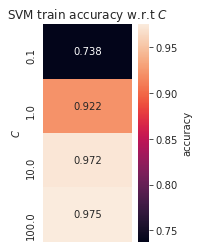

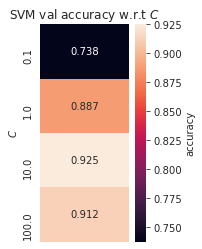

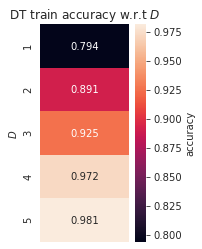

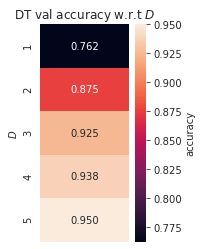

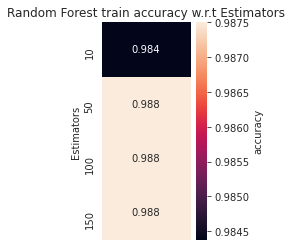

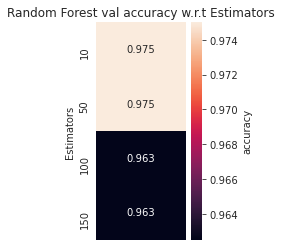

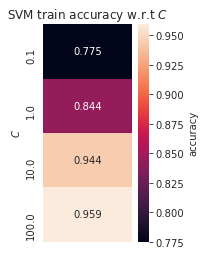

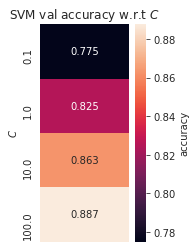

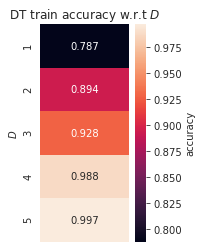

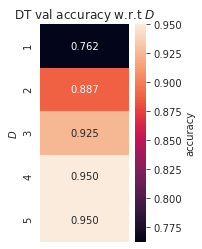

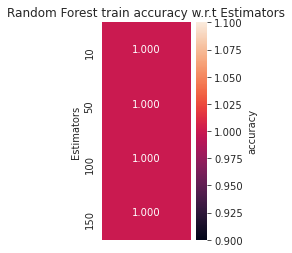

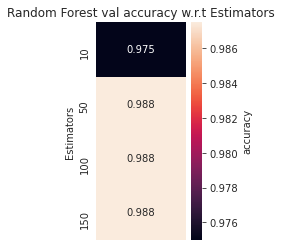

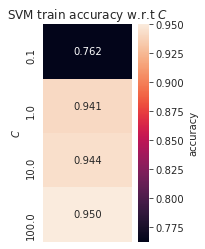

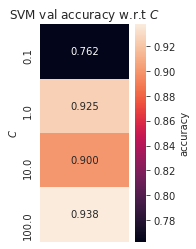

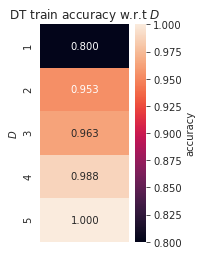

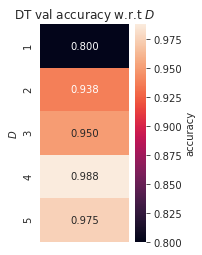

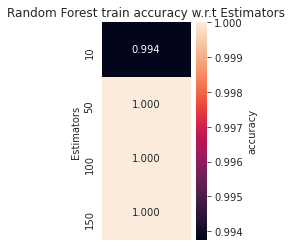

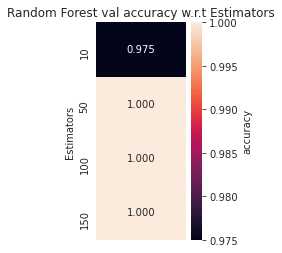

In [36]:
# Defining accuracy vectors
svm_acc = np.zeros(3)
dectree_acc = np.zeros(3)
random_forest_acc = np.zeros(3)

# Loop over 3 trials and average the accuracy
for i_zoo in range(3):
    # Shuffle data
    indices = np.random.permutation(len(X_zoo))
    X = X_zoo.values[indices]
    Y = y_zoo.values[indices]
    
    # Partition data (80/20)
    set_split = int(len(Y) * 0.8)
    X_train_val = X[:set_split]  # Features for train + validation set
    X_test = X[set_split:]       # Features for test set
    Y_train_val = Y[:set_split]  # Target for train + validation set
    Y_test = Y[set_split:]       # Target for test set

    # SVM classifier
    C_list = np.array([0.1, 1, 10, 100])
    parameters = {'C': C_list}
    classifier_grid = GridSearchCV(SVC(kernel='linear'), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing SVM accuracy using heatmaps
    heatmap_svm(classifier_grid.cv_results_['mean_train_score'].reshape(4,1), 'SVM train accuracy', C_list)
    heatmap_svm(classifier_grid.cv_results_['mean_test_score'].reshape(4,1), 'SVM val accuracy', C_list)
    # Finding best 'C' value, retrain classifier, and record accuracy
    C_star = classifier_grid.best_params_['C']
    classifier_test = SVC(C=C_star, kernel='linear')
    classifier_test.fit(X_train_val, Y_train_val)
    svm_acc[i_zoo] = classifier_test.score(X_test, Y_test)
    
    # Decision Tree classifier
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth': D_list}
    classifier_grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing Decision Tree accuracy using heatmaps
    heatmap_decision_tree(classifier_grid.cv_results_['mean_train_score'].reshape(5,1), 'DT train accuracy', D_list)
    heatmap_decision_tree(classifier_grid.cv_results_['mean_test_score'].reshape(5,1), 'DT val accuracy', D_list)
    # Finding best 'D' value, retrain classifier, and record accuracy
    D_star = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=D_star)
    classifier_test.fit(X_train_val, Y_train_val)
    dectree_acc[i_zoo] = classifier_test.score(X_test, Y_test)
    
    # Random Forest classifier
    estimators_list = [10, 50, 100, 150]
    parameters = {'n_estimators': estimators_list}
    classifier_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing Random Forest accuracy using heatmaps
    heatmap_random_forest(classifier_grid.cv_results_['mean_train_score'].reshape(len(estimators_list), 1),
                          'Random Forest train accuracy', estimators_list)
    heatmap_random_forest(classifier_grid.cv_results_['mean_test_score'].reshape(len(estimators_list), 1),
                          'Random Forest val accuracy', estimators_list)
    # Finding best number of estimators, retrain classifier, and record accuracy
    estimators_star = classifier_grid.best_params_['n_estimators']
    classifier_test = RandomForestClassifier(n_estimators=estimators_star)
    classifier_test.fit(X_train_val, Y_train_val)
    random_forest_acc[i_zoo] = classifier_test.score(X_test, Y_test)

### Partition Data (50/50)

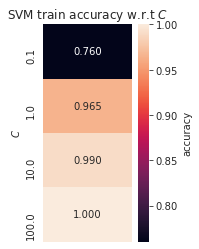

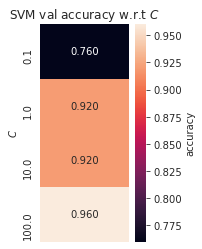

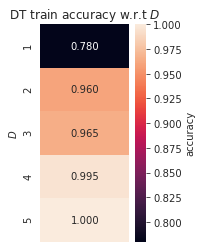

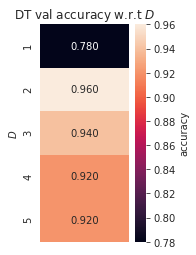

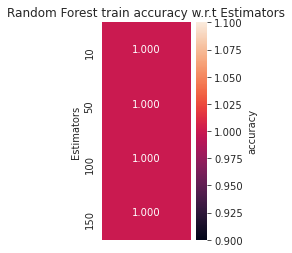

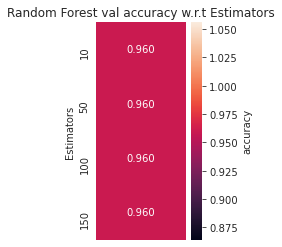

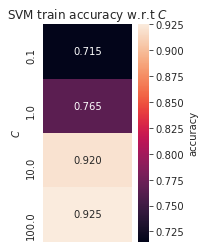

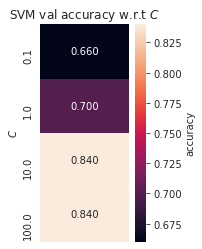

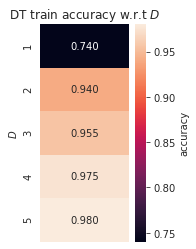

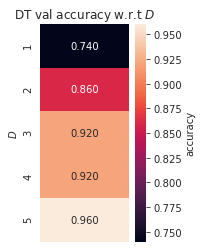

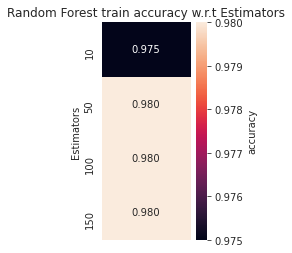

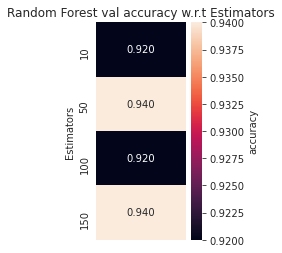

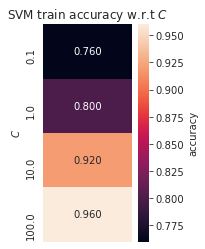

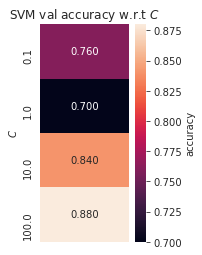

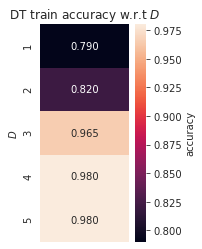

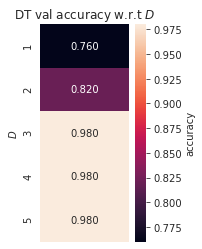

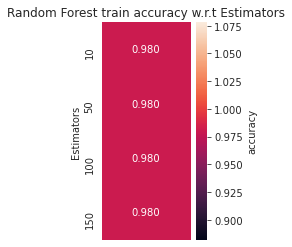

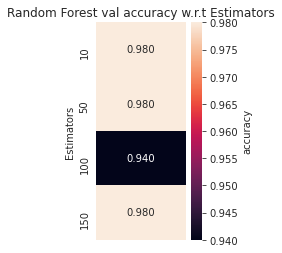

In [37]:
# Defining accuracy vectors
svm_acc = np.zeros(3)
dectree_acc = np.zeros(3)
knn_acc = np.zeros(3)

# Loop over 3 trials and average the accuracy
for i_zoo in range(3):
    # Shuffle data
    indices = np.random.permutation(len(X_zoo))
    X = X_zoo.values[indices]
    Y = y_zoo.values[indices]
    
    # Partition data (50/50)
    set_split = int(len(Y) * 0.5)
    X_train_val = X[:set_split]  # Features for train + validation set (50%)
    X_test = X[set_split:]       # Features for test set (50%)
    Y_train_val = Y[:set_split]  # Target for train + validation set (50%)
    Y_test = Y[set_split:]       # Target for test set (50%)

    # SVM classifier
    C_list = np.array([0.1, 1, 10, 100])  # You can adjust these values as needed
    parameters = {'C': C_list}
    classifier_grid = GridSearchCV(SVC(kernel='linear'), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing SVM accuracy using heatmaps
    heatmap_svm(classifier_grid.cv_results_['mean_train_score'].reshape(4,1), 'SVM train accuracy', C_list)
    heatmap_svm(classifier_grid.cv_results_['mean_test_score'].reshape(4,1), 'SVM val accuracy', C_list)
    # Finding best 'C' value, retrain classifier, and record accuracy
    C_star = classifier_grid.best_params_['C']
    classifier_test = SVC(C=C_star, kernel='linear')
    classifier_test.fit(X_train_val, Y_train_val)
    svm_acc[i_zoo] = classifier_test.score(X_test, Y_test)
    
    # Decision Tree classifier
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth': D_list}
    classifier_grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing Decision Tree accuracy using heatmaps
    heatmap_decision_tree(classifier_grid.cv_results_['mean_train_score'].reshape(5,1), 'DT train accuracy', D_list)
    heatmap_decision_tree(classifier_grid.cv_results_['mean_test_score'].reshape(5,1), 'DT val accuracy', D_list)
    # Finding best 'D' value, retrain classifier, and record accuracy
    D_star = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=D_star)
    classifier_test.fit(X_train_val, Y_train_val)
    dectree_acc[i_zoo] = classifier_test.score(X_test, Y_test)
    
    # Random Forest classifier
    estimators_list = [10, 50, 100, 150]
    parameters = {'n_estimators': estimators_list}
    classifier_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing Random Forest accuracy using heatmaps
    heatmap_random_forest(classifier_grid.cv_results_['mean_train_score'].reshape(len(estimators_list), 1),
                          'Random Forest train accuracy', estimators_list)
    heatmap_random_forest(classifier_grid.cv_results_['mean_test_score'].reshape(len(estimators_list), 1),
                          'Random Forest val accuracy', estimators_list)
    # Finding best number of estimators, retrain classifier, and record accuracy
    estimators_star = classifier_grid.best_params_['n_estimators']
    classifier_test = RandomForestClassifier(n_estimators=estimators_star)
    classifier_test.fit(X_train_val, Y_train_val)
    random_forest_acc[i_zoo] = classifier_test.score(X_test, Y_test)

### Partition Data (20/80)

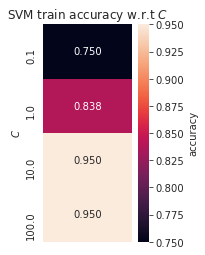

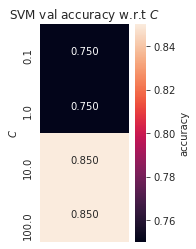

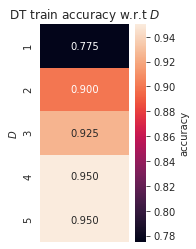

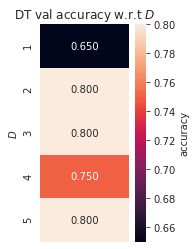

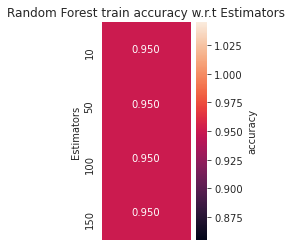

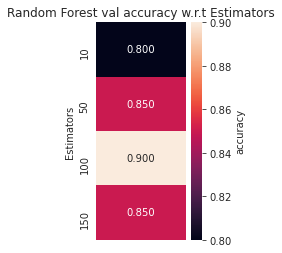

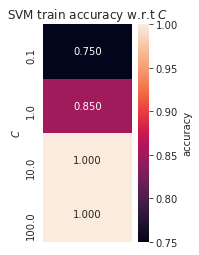

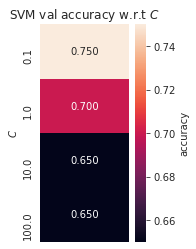

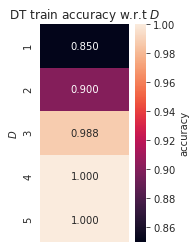

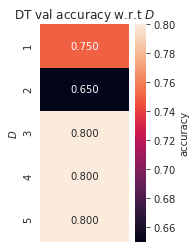

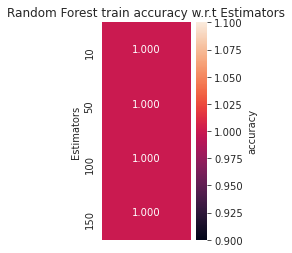

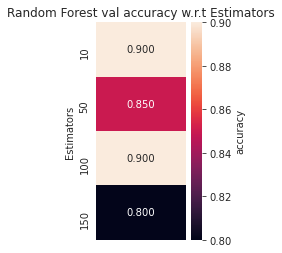

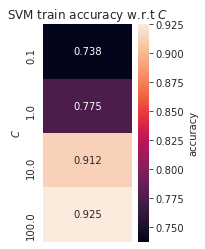

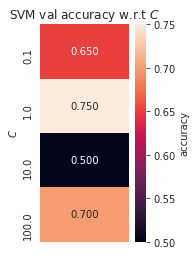

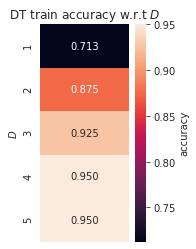

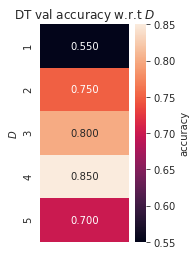

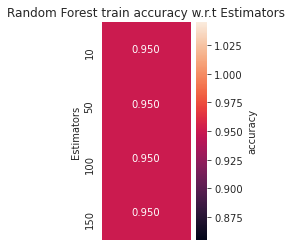

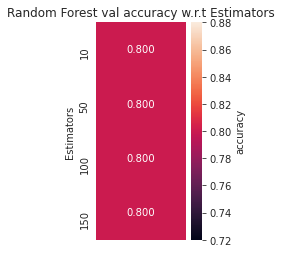

In [38]:
# Define accuracy vectors
svm_acc = np.zeros(3)
dectree_acc = np.zeros(3)
knn_acc = np.zeros(3)

# Loop over 3 trials and average the accuracy
for i_zoo in range(3):
    # Shuffle data
    indices = np.random.permutation(len(X_zoo))
    X = X_zoo.values[indices]
    Y = y_zoo.values[indices]
    
    # Partition data (20/80)
    set_split = int(len(Y) * 0.2)
    X_train_val = X[:set_split]  # Features for train + validation set (20%)
    X_test = X[set_split:]       # Features for test set (80%)
    Y_train_val = Y[:set_split]  # Target for train + validation set (20%)
    Y_test = Y[set_split:]       # Target for test set (80%)
    
    # SVM classifier
    C_list = np.array([0.1, 1, 10, 100])  # You can adjust these values as needed
    parameters = {'C': C_list}
    classifier_grid = GridSearchCV(SVC(kernel='linear'), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing SVM accuracy using heatmaps
    heatmap_svm(classifier_grid.cv_results_['mean_train_score'].reshape(4,1), 'SVM train accuracy', C_list)
    heatmap_svm(classifier_grid.cv_results_['mean_test_score'].reshape(4,1), 'SVM val accuracy', C_list)
    # Finding best 'C' value, retrain classifier, and record accuracy
    C_star = classifier_grid.best_params_['C']
    classifier_test = SVC(C=C_star, kernel='linear')
    classifier_test.fit(X_train_val, Y_train_val)
    svm_acc[i_zoo] = classifier_test.score(X_test, Y_test)
    
    # Decision Tree classifier
    D_list = np.array([1, 2, 3, 4, 5])
    parameters = {'max_depth': D_list}
    classifier_grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing Decision Tree accuracy using heatmaps
    heatmap_decision_tree(classifier_grid.cv_results_['mean_train_score'].reshape(5,1), 'DT train accuracy', D_list)
    heatmap_decision_tree(classifier_grid.cv_results_['mean_test_score'].reshape(5,1), 'DT val accuracy', D_list)
    # Finding best 'D' value, retrain classifier, and record accuracy
    D_star = classifier_grid.best_params_['max_depth']
    classifier_test = DecisionTreeClassifier(max_depth=D_star)
    classifier_test.fit(X_train_val, Y_train_val)
    dectree_acc[i_zoo] = classifier_test.score(X_test, Y_test)
    
    # Random Forest classifier
    estimators_list = [10, 50, 100, 150]
    parameters = {'n_estimators': estimators_list}
    classifier_grid = GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_val, Y_train_val)
    # Visualizing Random Forest accuracy using heatmaps
    heatmap_random_forest(classifier_grid.cv_results_['mean_train_score'].reshape(len(estimators_list), 1),
                          'Random Forest train accuracy', estimators_list)
    heatmap_random_forest(classifier_grid.cv_results_['mean_test_score'].reshape(len(estimators_list), 1),
                          'Random Forest val accuracy', estimators_list)
    # Finding best number of estimators, retrain classifier, and record accuracy
    estimators_star = classifier_grid.best_params_['n_estimators']
    classifier_test = RandomForestClassifier(n_estimators=estimators_star)
    classifier_test.fit(X_train_val, Y_train_val)
    random_forest_acc[i_zoo] = classifier_test.score(X_test, Y_test)